<a href="https://colab.research.google.com/github/azimhims/Image-Classification-Transfer-Learning/blob/master/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/miladfa7/Image-Classification-Transfer-Learning.git

fatal: destination path 'Image-Classification-Transfer-Learning' already exists and is not an empty directory.


In [ ]:
path = '/content/Image-Classification-Transfer-Learning/Dataset'

In [ ]:
import os
data = os.listdir(f"{path}/training")

In [ ]:
import tensorflow as tf

# Load training data using image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/Image-Classification-Transfer-Learning/Dataset/training',
    image_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    subset='training',
    validation_split=0.2,
    seed=123,
    label_mode='categorical'  # For multi-class classification
)

# Load validation data
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/Image-Classification-Transfer-Learning/Dataset/training',
    image_size=(224, 224),
    batch_size=32,
    subset='validation',
    validation_split=0.2,
    seed=123,
    label_mode='categorical'
)

# Load test data
test_dataset = tf.keras.utils.image_dataset_from_directory(
     '/content/Image-Classification-Transfer-Learning/Dataset/test',
     image_size=(224, 224),
     batch_size=32,
     shuffle=False,  # Do not shuffle test data
     label_mode=None
 )
#test_dataset = tf.keras.utils.image_dataset_from_directory()
def preprocess_image(image):
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # Normalize to [0, 1] range
    return image

# Preprocessing layers (optional but recommended)
preprocess_input = tf.keras.applications.resnet50.preprocess_input

# Apply preprocessing to datasets
train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (preprocess_input(x), y))
#test_dataset = test_dataset.map(lambda x, y: (preprocess_input(x), y))
test_dataset = test_dataset.map(lambda x: preprocess_image(x))


Found 1554 files belonging to 20 classes.
Using 1244 files for training.
Found 1554 files belonging to 20 classes.
Using 310 files for validation.
Found 500 files.


In [ ]:
test_dataset

<_MapDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load ResNet50 without top layers (pre-trained on ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom top layers for your specific classification task
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(20, activation='softmax')  # Adjust the number of classes (3 here for airplanes, bear, galaxy)
])

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(
#     train_dataset,
#     validation_data=validation_dataset,
#     epochs=10
# )


In [ ]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5
 )

Epoch 1/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 318ms/step - accuracy: 0.6719 - loss: 1.3131 - val_accuracy: 0.9226 - val_loss: 0.3295
Epoch 2/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.9850 - loss: 0.0493 - val_accuracy: 0.9387 - val_loss: 0.2224
Epoch 3/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.9962 - loss: 0.0111 - val_accuracy: 0.9419 - val_loss: 0.2107
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.9978 - loss: 0.0060 - val_accuracy: 0.9387 - val_loss: 0.2470
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.9988 - loss: 0.0070 - val_accuracy: 0.9419 - val_loss: 0.1944


In [ ]:
# test_dataset = tf.keras.utils.image_dataset_from_directory(directory =
#     '/content/Image-Classification-Transfer-Learning/Dataset/test',
#      image_size=(224, 224),
#      batch_size=32,
#      shuffle=False,  # Do not shuffle test data
#      label_mode=None
#  )

Found 500 files.


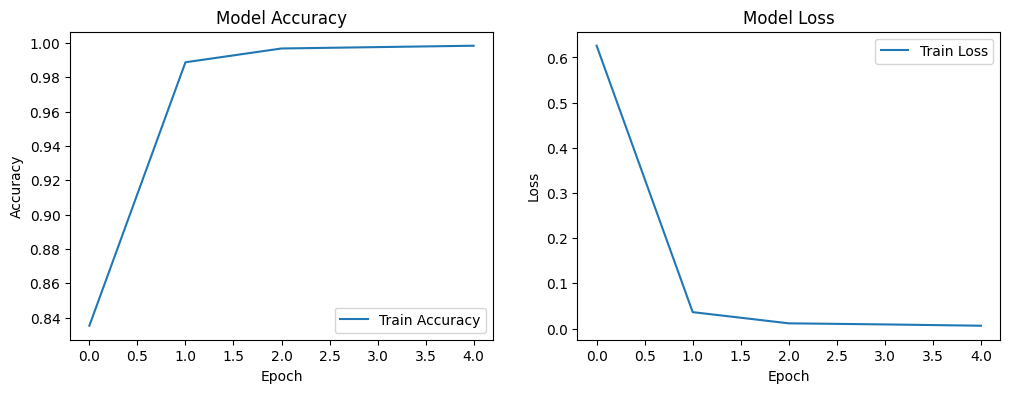

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
#plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
#plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
import os

# Function to get image paths from directory
def get_image_paths_from_directory(directory):
    file_paths = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_paths.append(os.path.join(subdir, file))
    return file_paths

# Directory of test images
test_directory = '/content/Image-Classification-Transfer-Learning/Dataset/test'

# Get paths
test_image_paths = get_image_paths_from_directory(test_directory)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━

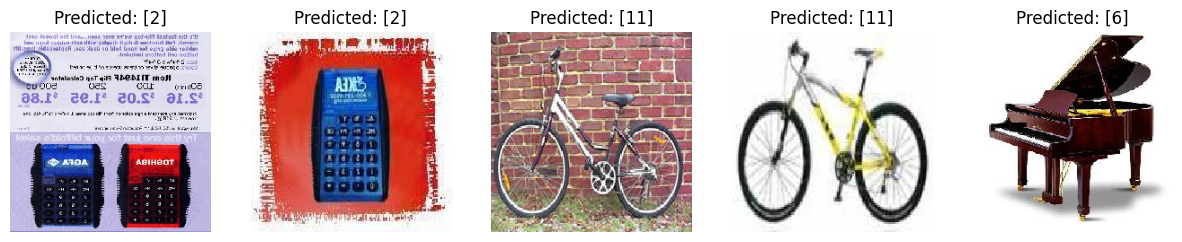

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)  # Apply the preprocessing function
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Make predictions
predictions = []
for img_path in test_image_paths:
    img_array = preprocess_image(img_path)
    pred = model.predict(img_array)
    predictions.append(pred)

predictions = np.array(predictions)
predicted_labels = np.argmax(predictions, axis=-1)

# Display some results
num_images_to_display = 5
plt.figure(figsize=(15, 10))
for i in range(num_images_to_display):
    img_path = test_image_paths[i]
    img = image.load_img(img_path, target_size=(224, 224))
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.axis('off')

plt.show()
